In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#로이터 기사 데이터셋 로딩
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(8982,)

In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
word_index=reuters.get_word_index()
reverse_wored_index=dict([value,key] for (key,value) in word_index.items())
decoded_newswire=" ".join([reverse_wored_index.get(i-3,"?")for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [20]:
#데이터 준비
def vetorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    
    for i, sequences in enumerate(sequences):
        results[i,sequences]=1
    return results

#데이터 변환
x_train=vetorize_sequences(train_data)
x_test=vetorize_sequences(test_data)

In [9]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [11]:
#라벨데이터 인코딩  이방법보다는 밑의 카테고리이용
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    
    for i,sequence in enumerate(labels):
        results[i,sequence]=1
        
    return results

one_hot_train_labels= to_one_hot(train_labels)
one_hot_test_lables=to_one_hot(test_labels)

In [12]:
# categorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_lables=to_categorical(test_labels)

In [34]:
#신경망 구성
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu',))
model.add(layers.Dense(46,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')

In [21]:
#훈련데이터 준비
x_val= x_train[:1000]
partial_x_train=x_train[1000:]
y_val= one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [36]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.6557 - accuracy: 0.5352 - val_loss: 1.7185 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4104 - accuracy: 0.7081 - val_loss: 1.3062 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0470 - accuracy: 0.7789 - val_loss: 1.1232 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8259 - accuracy: 0.8237 - val_loss: 1.0361 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6649 - accuracy: 0.8581 - val_loss: 0.9695 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5375 - accuracy: 0.8854 - val_loss: 0.9412 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4280 - accuracy: 0.9067 - val_loss: 0.9131 - val_accuracy: 0.8060
Epoch 8/20
16

In [23]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

epochs=range(1,len(loss)+1)

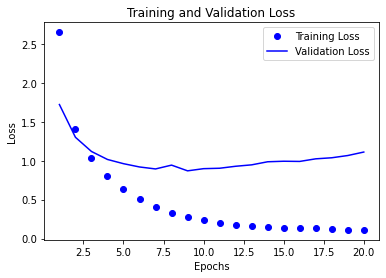

In [26]:
plt.plot(epochs,loss,'bo',label="Training Loss")
plt.plot(epochs,val_loss,"b-",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

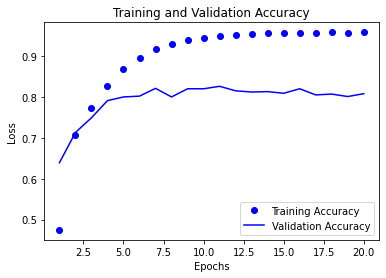

In [27]:
plt.plot(epochs,acc,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc,"b-",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()